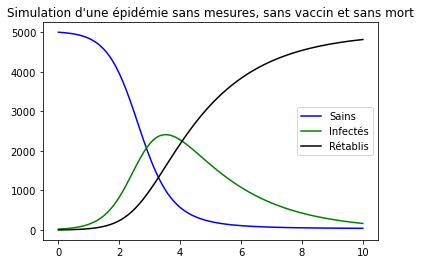

()

In [2]:
# SIR RK4 DE BASE
import numpy as np

def SIRpas(X,r,a):
    """X est la matrice contenant, dans cet ordre, les individus sains,
    les infectés et les rétablis à un instant donné.
    r et a sont des constantes"""
    return(np.array([-r*X[1]*X[0],
                    r*X[1]*X[0]-a*X[1],
                    a*X[1]])
                    )

import matplotlib.pyplot as plt

def SIR(PopulationInitiale,r,a,fin,pas):
    """Approximation d'un système d'équations différentielles SIR par RK4
    PopulationInitiale est la matrice des individus Sains, Infectés et Rétablis à t=0
    r et a sont des constantes"""
    NbreIterations=int(fin/pas)
    Population=PopulationInitiale
    f=lambda X:SIRpas(X,r,a)
    S=[0 for i in range(NbreIterations+1)]
    S[0]=Population[0]
    I=[0 for i in range(NbreIterations+1)]
    I[0]=Population[1]
    R=[0 for i in range(NbreIterations+1)]
    R[0]=Population[2]
    temps=[0 for i in range(NbreIterations+1)]
    for i in range(NbreIterations):
        k1=f(Population)
        k2=f(Population+k1*pas/2)
        k3=f(Population+k2*pas/2)
        k4=f(Population+k3*pas)
        Population= Population + (k1+2*k2+2*k3+k4)*pas/6
        temps[i+1]=(i+1)*pas
        S[i+1]=Population[0]
        I[i+1]=Population[1]
        R[i+1]=Population[2]
    
    plt.title("Simulation d'une épidémie sans mesures, sans vaccin et sans mort")
    plt.plot(temps,S,'b', label='Sains')
    plt.plot(temps,I,'g', label='Infectés')
    plt.plot(temps,R,'k', label='Rétablis')
    plt.legend()
    plt.show()
    
    return()

SIR(np.array([5000,20,0]),0.0005,0.5,10,0.1)

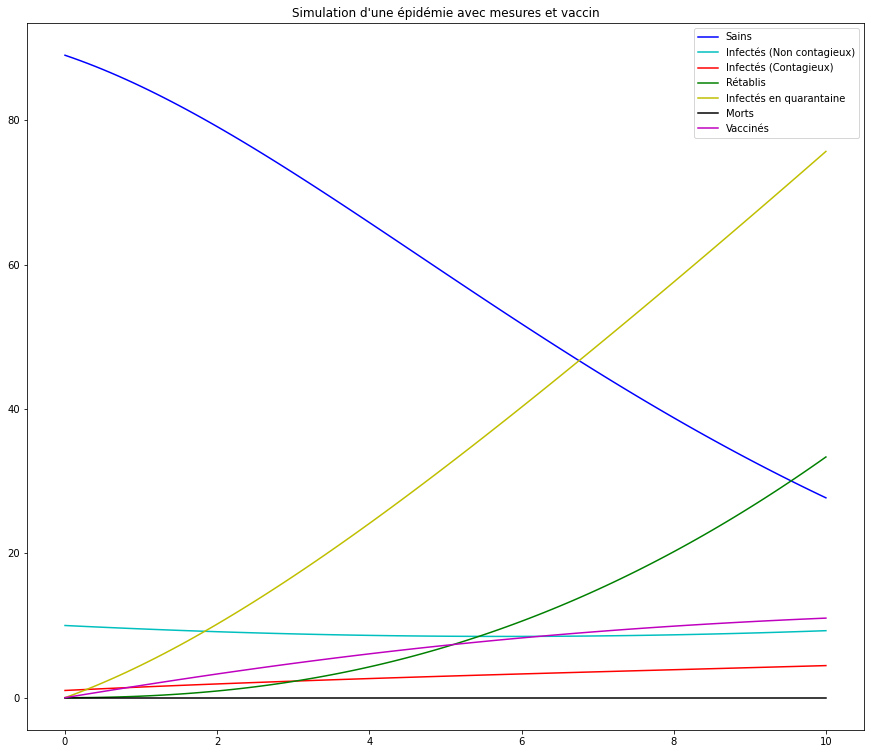

()

In [4]:
# SIR RK4 AVEC TOUT

#from settings import PROCESSED_DATA_PATH

import numpy as np

def SIRpas(X,L,b,a,mu,g,s,d,k,l,r):
    """X est la matrice contenant, dans cet ordre, les individus sains, exposés,
    infectés, infectés en quarantaine, guéris, morts, et les rétablis à un instant donné.
    L,b,a,mu,g,s,D,k,l et r sont des constantes
    L = Nouvelles naissances et arrivants par unité de temps
    b = taux de transmission divisé par N
    a = taux de vaccination
    mu = taux de mort naturel
    g = période d'incubation
    s = taux inefficacité vaccin
    d = temps d'infection
    k = taux de létalité (mortlité du a une maladie)
    l = temps de rétablissement
    r = temps jusqu'à la mort
    """
    return(np.array([L - b*X[2]*X[0] - a*X[2] - mu*X[2], #Sains
                    b*X[2]*X[2] - g*X[1] + s*b*X[6]*X[2] - mu*X[1], #Exposés, infectés mais pas encore contagieux
                    g*X[1] - s*X[2] - mu*X[2], #Infectés (Pas en quarantaine)
                    d*X[2] - (1-k)*l*X[3] - k*r*X[3] - mu*X[3], #Infectés en quarantaine
                    (1-k)*l*X[3] - mu*X[4],  #Guéris
                    k*r*X[5], #Morts
                    a*X[0] - s*b*X[6]*X[2] - mu*X[6]] #Vaccinés
                    ))

import matplotlib.pyplot as plt
def SIR(PopulationInitiale,L,b,a,mu,g,s,d,k,l,r,fin,pas):
    """Approximation d'un système d'équations différentielles SIR par RK4
    PopulationInitiale est la matrice des individus Sains, Infectés et Rétablis à t=0
    L,b,a,mu,g,s,D,k,l et r sont des constantes"""
    
    NbreIterations=int(fin/pas)
    Population=PopulationInitiale
    f=lambda X:SIRpas(X,L,b,a,mu,g,s,d,k,l,r)
    S=[0 for i in range(NbreIterations+1)]
    S[0]=Population[0]
    E=[0 for i in range(NbreIterations+1)]
    E[0]=Population[1]
    I=[0 for i in range(NbreIterations+1)]
    I[0]=Population[2]
    Q=[0 for i in range(NbreIterations+1)]
    Q[0]=Population[3]
    R=[0 for i in range(NbreIterations+1)]
    R[0]=Population[4]
    D=[0 for i in range(NbreIterations+1)]
    D[0]=Population[5]
    V=[0 for i in range(NbreIterations+1)]
    V[0]=Population[6]
    temps=[0 for i in range(NbreIterations+1)]
    for i in range(NbreIterations):
        k1=f(Population)
        k2=f(Population+k1*pas/2)
        k3=f(Population+k2*pas/2)
        k4=f(Population+k3*pas)
        Population= Population + (k1+2*k2+2*k3+k4)*pas/6
        temps[i+1]=(i+1)*pas
        S[i+1]=Population[0]
        E[i+1]=Population[1]
        I[i+1]=Population[2]
        Q[i+1]=Population[3]
        R[i+1]=Population[4]
        D[i+1]=Population[5]
        V[i+1]=Population[6]
    
    fig = plt.figure(1, figsize=(15, 13))
    plt.title("Simulation d'une épidémie avec mesures et vaccin")
    plt.plot(temps,S,'b', label='Sains')
    plt.plot(temps,E,'c', label='Infectés (Non contagieux)')
    plt.plot(temps,I,'r', label='Infectés (Contagieux)')
    plt.plot(temps,R,'g', label='Rétablis')
    plt.plot(temps,Q,'y', label='Infectés en quarantaine')
    plt.plot(temps,D,'k', label='Morts')
    plt.plot(temps,V,'m', label='Vaccinés')
    
    plt.legend()
    plt.show()
    
    return()

SIR(np.array([89,10,1,0,0,0,0]),
            1/100,
            4/100,
            1.95/100,
            0.000003,
            5.5/100,
            0.05,
            3.8,
            0.014,
            1/10,
            1/5,
            10, #sur 10 jours
            0.1)